### Pipelines

- objects that take a **list of tuples** as input
- tuple: must always contain:
    - **a string name** as the first element
    - and any **scikit-learn compatible transformer** or **estimator object** as the second element
- each tuple in the pipeline is called a **step**
- the list of transformations are contained in the list, are executed in order once some data is passed through the pipeline (done through fit/predict paradigm)
- **most useful**: can be used as **input estimator objects** into other scikit-learn objects themselves (such as "cross_val_score" method, or grid/randomized search)

In [ ]:
#example of pipeline

#importing modules
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

#feature and target vectors, X and y
X, y = data.iloc[:, :-1], data.iloc[:, -1]

#creating pipeline structure
rf_pipeline = Pipeline[
    ("std_scaler", StandardScaler()),
    ("rf_model", RandomForestRegressor())
]

scores = cross_val_score(rf_pipeline, X, y, scoring="neg_mean_squared_error", cv=10)
final_avg_rmse = np.mean(np.sqrt(np.abs(scores)))
print("Final RMSE:", final_avg_rmse)

### Preprocessing I: LabelEncoder and OneHotEncoder

- **LabelEncoder**: converts a categorical column of strings into integers
- **OneHotEncoder**: takes the column of integers and encodes them as dummy variables

### Preprocessing II: DictVectorizer

- traditionally used in text processing
- converts lists of features mappings into vectors

### To get XGBoost within a Pipeline

- All that's required is using XGBoost's scikit-learn API

In [ ]:
#import xgboost/modeling related modules
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

#feature and target vectors, X and y
X, y = data.iloc[:, :-1], data.iloc[:, -1]

#pass an instance of XGBRegressor
xgb_pipeline = Pipeline[
    ("std_scaler", StandardScaler()),
    ("rf_model", xgb.XGBRegressor())
]

scores = cross_val_score(xgb_pipeline, X, y, scoring="neg_mean_squared_error", cv=10)
final_avg_rmse = np.mean(np.sqrt(np.abs(scores)))
print("Final XGB RMSE:", final_avg_rmse)

Additional features:
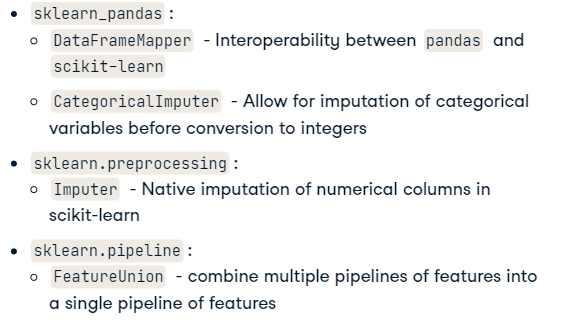

### Tuning XGBoost Hyperparamaters in a pipeline

- same as much of the steps above, except now also integrating RandomizedSearchCV

In [ ]:
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

xgb_pipeline = Pipeline[
    ("std_scaler", StandardScaler()),
    ("rf_model", xgb.XGBRegressor())
]

gbm_param_grid = {
    'gbm_model__subsample': np.arrange(.05, 1, .05),
    'xgb_model__max_depth': np.arrange(3,20,1)
    'xgb_model__colsample_bytree': np.arrange(.1, 1.05, .05)
}

randomized_neg_mse = RandomizedSearchCV(estimator=xgb_piepline, param_distributions=gbm_param_grid,
                                       n_iter=10, scoring='neg_mean_squared_error', cv=4)

randomized_neg_mse.fit(X, y)
print("Best rmse: ", np.sqrt(np.abs(randomized_neg_mse.best_score_)))
print("Best model: ", randomized_neg_mse.best_estimator_)